# 0. Import libraries

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import Data

In [170]:
train_link='https://raw.githubusercontent.com/duonghung86/Titanic-machine-learning/master/train.csv'
test_link='https://raw.githubusercontent.com/duonghung86/Titanic-machine-learning/master/test.csv'
train = pd.read_csv(train_link)
test = pd.read_csv(test_link)

train.head()
#print(test.head())    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2.  Data epxloration

Name of all features: 
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


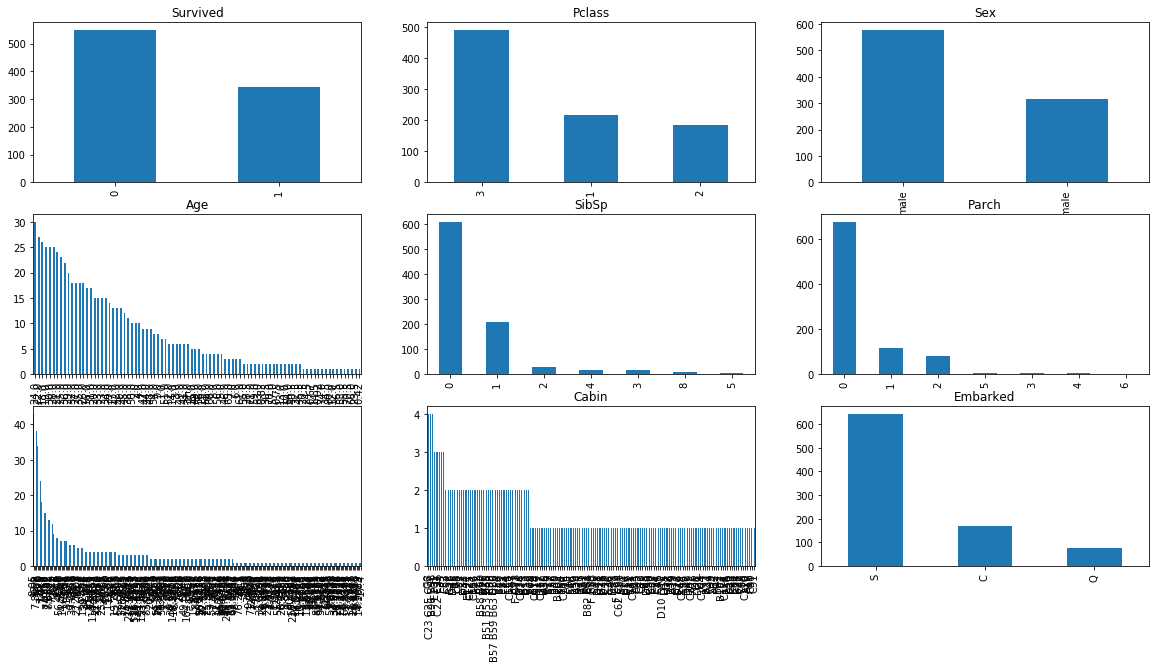

In [171]:
feats=list(train.columns)
print('Name of all features: \n',feats)
#remove unwanted features
feats.remove('PassengerId')
feats.remove('Name')
feats.remove('Ticket')
plt.figure(figsize=(20,10))
#train.isnull()
i=1
for feat in feats:
    plt.subplot(3,3,i)
    train[feat].value_counts().plot(kind='bar',title=feat)
    i+=1

In [172]:
print('Features that contains missing data:')
for feat in feats:
    if train[feat].isnull().any():
        print(feat, train[feat].isnull().sum())

Features that contains missing data:
Age 177
Cabin 687
Embarked 2


In [173]:
print('Features that contains missing data in TEST set:')
feats_test=test.columns
for feat in feats_test:
    if test[feat].isnull().any():
        print(feat, test[feat].isnull().sum())


Features that contains missing data in TEST set:
Age 86
Fare 1
Cabin 327


## 2.1 Fill the missing data

### 2.1.1. Embarked feature

Because there is only 2 missing vales → Use the majority of the feature to fill the missing data

In [174]:
train['Embarked'].fillna('S',inplace=True)
train[feat].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### 2.1.2. Cabin features

In [175]:
feats.remove('Cabin')

### 2.1.3 Convert all qualitative features to dummies

In [176]:
q_feats=['Pclass', 'Sex', 'Embarked']
train_wd=train[feats]
for feat in q_feats:
    dummies=pd.get_dummies(train[feat],prefix=feat)
    train_wd=train_wd.drop(feat, axis=1)
    train_wd=train_wd.join(dummies)
train_wd.head()
    

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [177]:
test_wd=test[feats_test]
for feat in q_feats:
    dummies=pd.get_dummies(test[feat],prefix=feat)
    test_wd=test_wd.drop(feat, axis=1)
    test_wd=test_wd.join(dummies)
test_wd=test_wd.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test_wd.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


### 2.1.4. Age feature

Age is continuous variable → use linear regression to predict the missing values

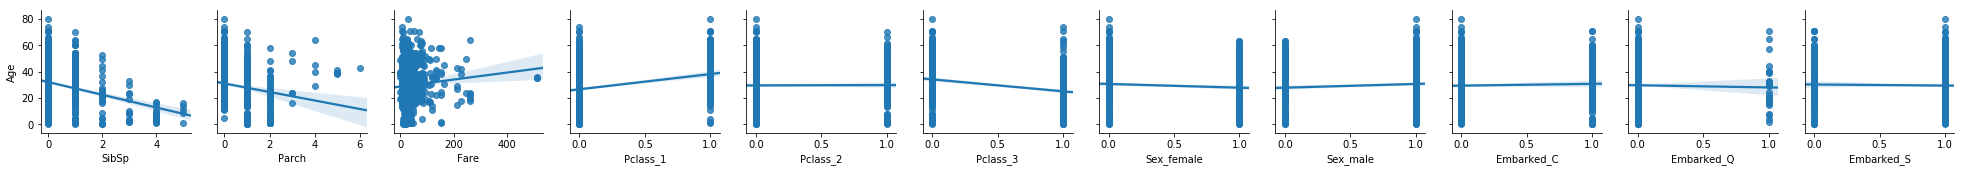

In [178]:
train_wd_na=train_wd.dropna().copy()
sns.pairplot(train_wd_na,kind="reg",y_vars=['Age'],x_vars=train_wd_na.columns.drop(['Age','Survived']))


In [179]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [180]:
X = train_wd_na.drop(['Age','Survived'],axis=1)  # values converts it into a numpy array
Y = train_wd_na['Age']  # -1 means that calculate the dimension of rows, but have 1 column

#Statistic table
model=sm.OLS(Y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     29.22
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           1.72e-39
Time:                        16:28:44   Log-Likelihood:                -2821.0
No. Observations:                 714   AIC:                             5660.
Df Residuals:                     705   BIC:                             5701.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SibSp         -3.9055      0.559     -6.985      0.000      -5.003      -2.808
Parch         -0.7279      0.631     -1.154      0.249      -1.966       0.510
Fare          -0.0221      0.012     -1.857      0.064      -0.045       0.001
Pclass_1      18.6241      1.051     17.714      0.000      16.560      20.688
Pclass_2       7.7321      0.859      9.006      0.000       6.046       9.418
Pclass_3       2.9957      0.693      4.321      0.000       1.634       4.357
Sex_female    13.1915      0.740     17.833      0.000      11.739      14.644
Sex_male      16.1605      0.646     25.034      0.000      14.893      17.428
Embarked_C     7.0710      1.106      6.392      0.000       4.899       9.243
Embarked_Q    12.3691      1.888      6.552      0.000       8.662      16.076
Embarked_S     9.9119      0.776     12.775      0.000       8.389      11.435
==============================================================================
Omnibus:                       17.250   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.896
Skew:                           0.364   Prob(JB):                     0.000130
Kurtosis:                       3.266   Cond. No.                     1.11e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

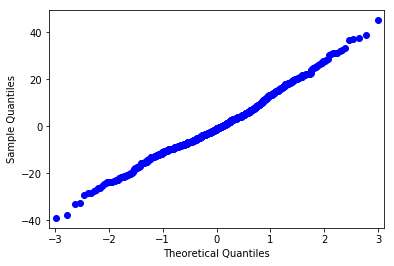

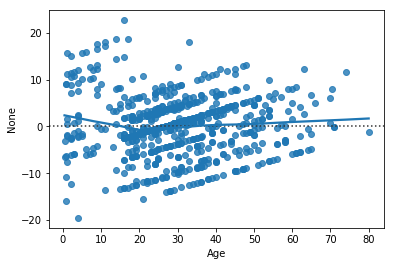

In [181]:
X = train_wd_na.drop(['Age','Parch','Fare','Survived'],axis=1)  # reduce the feature that have large P values

#Statistic table
model=sm.OLS(Y,X).fit()
model.summary()
res = model.resid # residuals
fig = sm.qqplot(res)
plt.show()
sns.residplot(Y, res, lowess=True)
plt.show()

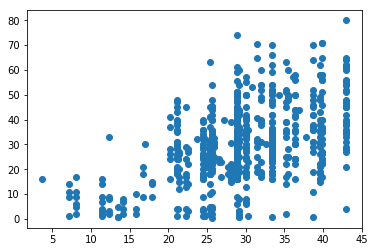

In [182]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)
plt.scatter(Y_pred,Y)
plt.show()

In [183]:
#Predict Age for Train set
X_test=train_wd[train_wd['Age'].isnull()]
X_test=X_test.drop(columns=['Age','Fare','Parch','Survived'],axis=1)
Y_test=linear_regressor.predict(X_test)
Y_test[Y_test<0]=np.mean(Y_test)
train_wd['Age'][train_wd['Age'].isnull()]=Y_test

#Predict Age for Test set
X_test_T=test_wd.drop(columns=['Age','Fare','Parch'],axis=1)
Ap_test=linear_regressor.predict(X_test_T)
Ap_test[Ap_test<0]=np.mean(Ap_test)
test_wd['Age'][test_wd['Age'].isnull()]=Ap_test

C:\Users\Duong Hung\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Duong Hung\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


## Data organization

In [184]:
train_wd.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [197]:
test_wd['Fare'].fillna(method='ffill',inplace=True)
test_wd.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


## Model building 


In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [186]:
y=train_wd.Survived
X=train_wd.drop('Survived',axis=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
result.summary2()

C:\Users\Duong Hung\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Duong Hung\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Duong Hung\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Duong Hung\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Optimization terminated successfully.
         Current function value: 0.437866
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Pseudo R-squared:   0.342     
Dependent Variable:     Survived           AIC:                800.2770  
Date:                   2019-11-07 16:28   BIC:                848.2004  
No. Observations:       891                Log-Likelihood:     -390.14   
Df Model:               9                  LL-Null:            -593.33   
Df Residuals:           881                LLR p-value:        5.9652e-82
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         8.0000                                           
-------------------------------------------------------------------------
            Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
-------------------------------------------------------------------------
Age        -0.0435       0.0082 -5.2951 0.0000       -0.0596      -0.0274
SibSp      -0.3602       0.1134 -3.1772 0.0015       -0.5824      -0.1380
Parch      -0.0921       0.1201 -0.7667 0.4433       -0.3276       0.1434
Fare        0.0020       0.0025  0.8116 0.4170       -0.0028       0.0068
Pclass_1    1.6373 4750738.2856  0.0000 1.0000 -9311274.3025 9311277.5770
Pclass_2    0.5615 4688280.6461  0.0000 1.0000 -9188860.6542 9188861.7772
Pclass_3   -0.7211 4602246.7105 -0.0000 1.0000 -9020238.5216 9020237.0795
Sex_female  2.0838          nan     nan    nan           nan          nan
Sex_male   -0.6061          nan     nan    nan           nan          nan
Embarked_C  0.6092          nan     nan    nan           nan          nan
Embarked_Q  0.6375          nan     nan    nan           nan          nan
Embarked_S  0.2309          nan     nan    nan           nan          nan
=========================================================================

"""

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Duong Hung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.81


In [209]:
sur_pre = logreg.predict(test_wd) 
report=pd.DataFrame()
report['PassengerId']=test.PassengerId
report['Survived']=sur_pre
report.to_csv('LR_submission_0.csv',index=False)
report

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


10 fold cross validation

In [189]:
from sklearn.model_selection import KFold

In [190]:
cv = KFold(10, True, 1)
for train_index, test_index in cv.split(X):
    
    X_train, X_test, y_train, y_test =X.iloc[train_index], X.iloc[test_index], y[train_index], y[test_index]
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

C:\Users\Duong Hung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Duong Hung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Duong Hung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Duong Hung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Duong Hung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

Accuracy of logistic regression classifier on test set: 0.78
Accuracy of logistic regression classifier on test set: 0.83
Accuracy of logistic regression classifier on test set: 0.75
Accuracy of logistic regression classifier on test set: 0.75
Accuracy of logistic regression classifier on test set: 0.81
Accuracy of logistic regression classifier on test set: 0.84
Accuracy of logistic regression classifier on test set: 0.89
Accuracy of logistic regression classifier on test set: 0.79
Accuracy of logistic regression classifier on test set: 0.82
Accuracy of logistic regression classifier on test set: 0.80


C:\Users\Duong Hung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Duong Hung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Evaluation

In [191]:
print('Features that contains missing data:')
feats=test.columns
for feat in feats:
    if test[feat].isnull().any():
        print(feat, test[feat].isnull().sum())

Features that contains missing data:
Age 86
Fare 1
Cabin 327
